In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option("display.max_columns", None)

## 1. Load the Lending Club dataset

In [3]:
#load the dataset
loans = pd.read_csv('lending-club-data.csv',index_col=0) 

/Users/pengshuang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
loans.isna().sum().sum()

482746

In [5]:
loans.shape

(122607, 67)

In [6]:
loans.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,not_compliant,inactive_loans,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,1.226030e+05,122607.000000,122578.000000,122578.000000,50500.000000,12531.000000,122578.000000,122578.000000,1.226070e+05,122607.000000,122578.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122462.000000,15460.000000,122607.0,122607.000000,122607.0,122607.000000,122607.000000,122607.000000,122607.000000,122578.000000,122578.000000,122462.000000,122607.000000,122603.000000,122607.000000,122607.000000,122607.000000
mean,5.493222e+06,12809.733743,12736.123753,12497.828395,13.639487,396.623285,7.138502e+04,15.496888,0.211996,0.980861,35.258198,73.964488,10.457749,0.103477,1.483507e+04,53.716307,24.248169,22.028899,22.015354,12510.211529,12269.338465,10707.864970,1696.232305,0.742344,105.371929,4.957537,6156.808616,0.003495,42.428913,1.0,0.021761,1.0,0.188815,6.370256,4.232882,0.597509,0.858107,0.908173,0.996734,0.123672,7.564725,0.588115,0.897795,0.873906
std,6.604693e+06,7932.313398,7887.167118,7946.731527,4.390836,239.475936,5.841483e+04,7.497442,0.662052,1.263588,21.950074,35.855540,4.713957,0.359382,1.937773e+04,25.723881,11.629814,611.510973,611.116057,9046.331429,9061.593794,8041.776401,1793.448627,5.363268,575.651981,94.427007,7155.007894,0.063674,21.457282,0.0,0.145901,0.0,0.391363,3.736014,1.362138,0.278934,0.348942,0.288783,0.057059,0.329208,4.127291,0.492177,0.302918,0.331957
min,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,0.000000,0.000000,0.000000
25%,1.064872e+06,6700.000000,6625.000000,6271.000000,10.620000,215.985000,4.405250e+04,9.880000,0.000000,0.000000,17.000000,52.000000,7.000000,0.000000,5.474000e+03,34.800000,16.000000,0.000000,0.000000,5669.805000,5454.050000,4500.000000,550.555000,0.000000,0.000000,0.000000,440.180000,0.000000,25.000000,1.0,0.000000,1.0,0.000000,3.000000,3.000000,0.400000,1.000000,1.000000,1.000000,0.000000,4.362575,0.000000,1.000000,1.000000
50%,1.879659e+06,11000.000000,10950.000000,10500.000000,13.480000,348.180000,6.000000e+04,15.260000,0.000000,1.000000,33.000000,86.000000,10.000000,0.000000,1.058600e+04,55.700000,23.000000,0.000000,0.000000,10575.400000,10352.500000,9100.000000,1136.920000,0.000000,0.000000,0.000000,3609.580000,0.000000,41.000000,1.0,0.000000,1.0,0.000000,6.000000,4.000000,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,1.000000,1.000000,1.000000
75%,8.117948e+06,17600.000000,17425.000000,17000.000000,16.290000,521.930000,8.500000e+04,20.850000,0.000000,2.000000,51.000000,103.000000,13.000000,0.000000,1.855200e+04,74.300000,31.000000,0.000000,0.000000,17177.650000,16914.050000,15000.000000,2167.950000,0.000000,0.000000,0.000000,9554.700000,0.000000,60.000000,1.0,0.000000,1.0,0.000000,11.000000,5.000000,0.800000,1.000000,1.000000,1.000000,0.000000,10.215850,1.000000,1.000000,1.000000
max,4.060424e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.880000,29.000000,33.000000,152.000000,129.0000

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122607 entries, 1077501 to 9604874
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    122607 non-null  int64  
 1   loan_amnt                    122607 non-null  int64  
 2   funded_amnt                  122607 non-null  int64  
 3   funded_amnt_inv              122607 non-null  int64  
 4   term                         122607 non-null  object 
 5   int_rate                     122607 non-null  float64
 6   installment                  122607 non-null  float64
 7   grade                        122607 non-null  object 
 8   sub_grade                    122607 non-null  object 
 9   emp_title                    115767 non-null  object 
 10  emp_length                   118516 non-null  object 
 11  home_ownership               122607 non-null  object 
 12  annual_inc                   122603 non-null  float

### - Exploring features

In [8]:
#print out features' names
loans.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_grade_num

### - Features for the classification algorithm

In [9]:
features = ['grade',   # grade of the loan
'sub_grade',       # sub-grade of the loan
'short_emp',    # one year or less of employment
'emp_length_num',  # number of years of employment
'home_ownership',   # home_ownership status: own, mortgage or rent
'dti',     # debt to income ratio
'purpose',    # the purpose of the loan
'term',     # the term of the loan
'last_delinq_none',    # has borrower had a delinquincy
'last_major_derog_none',   # has borrower had 90 day or worse rating
'revol_util',   # percent of available credit being used
'total_rec_late_fee'    # total late fees received to day
]

In [10]:
#skip observations with missing values in features
loans.dropna(subset=['grade','sub_grade','short_emp','emp_length_num','home_ownership','dti','purpose','term',\
                     'last_delinq_none','last_major_derog_none','revol_util','total_rec_late_fee'],inplace = True)

### - Exploring the target column

In [11]:
target = loans['bad_loans']

In [12]:
target

id
1077501    0
1077430    1
1077175    0
1076863    0
1075269    0
          ..
9856168    1
9795013    0
9695736    1
9684700    1
9604874    0
Name: bad_loans, Length: 122607, dtype: int64

In [13]:
print("The percentage of safe loans is: {:.2f}".format(sum(target == 0) / len(target)))
print("The percentage of risky loans is: {:.2f}".format(sum(target == 1) / len(target)))

The percentage of safe loans is: 0.81
The percentage of risky loans is: 0.19


### - Sample data to balance classes

In [14]:
#create two new datasets
safe_loans_raw = loans[loans['bad_loans'] ==0]
risky_loans_raw = loans[loans['bad_loans'] ==1]

In [15]:
# Since there are fewer risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac=percentage,random_state=1)

# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

In [16]:
#verify the percentage of safe loans and risky loans.
print("The percentage of safe loans is: {:.2f}".format(len(safe_loans) / len(loans_data)))
print("The percentage of risky loans is: {:.2f}".format(len(risky_loans) / len(loans_data)))

The percentage of safe loans is: 0.50
The percentage of risky loans is: 0.50


### - Split data into training and validation and test sets

In [17]:
#categorical columns
col_cat = ['grade','sub_grade','home_ownership','purpose','term']

#numerical columns
col_num =['short_emp','emp_length_num','dti','last_delinq_none','last_major_derog_none',\
          'revol_util','total_rec_late_fee']

#features columns:
X = loans_data[['grade','sub_grade','short_emp','emp_length_num','home_ownership','dti','purpose',\
                'term','last_delinq_none','last_major_derog_none','revol_util','total_rec_late_fee']]

#target column
y=loans_data['bad_loans']

In [18]:
#split the data into trainval and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

#split the data into trainval and test
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2,random_state=0)

### - Build a MLP classifier - based on accuracy

In [19]:
#build pipeline preprocessor
pipe_cat = OneHotEncoder(handle_unknown='ignore')
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

#build the pipeline for preprocessor and MLP
pipe = make_pipeline(preprocessor, MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (10, 10), (50, 50)]
             }
model1 = GridSearchCV(pipe, param_grid,return_train_score=True, cv=5, n_jobs=-1)

In [20]:
model1.fit(X_trainval, y_trainval)

/Users/pengshuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'purpose',
                                                                          'term']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['short_emp',
                 

In [21]:
#report the performance
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score,roc_auc_score

#get the predicted values for test set
model1_predicted = model1.predict(X_test)

print('Accuracy of model1: {:.2f}'.format(accuracy_score(y_test, model1_predicted)))
print('Precision of model1: {:.2f}'.format(precision_score(y_test, model1_predicted)))
print('Recall of model1: {:.2f}'.format(recall_score(y_test, model1_predicted)))
print('F1 of model1: {:.2f}'.format(f1_score(y_test, model1_predicted)))
print('Balanced accuracy score of model1: {:.2f}'.format(balanced_accuracy_score(y_test, model1_predicted)))
print('Roc auc score of model1: {:.2f}'.format(roc_auc_score(y_test, model1_predicted)))

Accuracy of model1: 0.63
Precision of model1: 0.62
Recall of model1: 0.62
F1 of model1: 0.62
Balanced accuracy score of model1: 0.63
Roc auc score of model1: 0.63


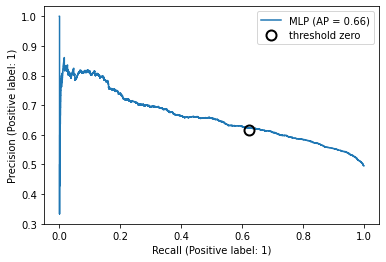

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support

pr_mlp = plot_precision_recall_curve(model1, X_test, y_test, name='MLP')
# also compute the precision/recall trade-off from predict
p_mlp, r_mlp, _, _ = precision_recall_fscore_support(y_test, model1.predict(X_test), average='binary') 
#plot the dot on the graph

plt.plot(p_mlp, r_mlp, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()

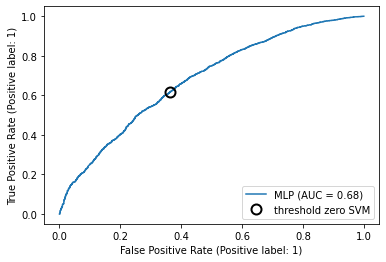

In [23]:
from sklearn.metrics import plot_roc_curve

#plot ROC curve
confusion_mlp = confusion_matrix(y_test, model1.predict(X_test), normalize='true')

plot_roc_curve(model1, X_test, y_test, name='MLP')

plt.plot(confusion_mlp[0, 1], confusion_mlp[1, 1], 'o', markersize=10,
         label="threshold zero SVM", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

### - Build a MLP classifier - based on ROC-AUC

In [24]:
#build pipeline preprocessor
pipe_cat = OneHotEncoder(handle_unknown='ignore')
pipe_num = StandardScaler()
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num)) 

#build the pipeline for preprocessor and MLP
pipe = make_pipeline(preprocessor, MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (10, 10), (50, 50)]
             }
model2 = GridSearchCV(pipe, param_grid,return_train_score=True, cv=5, scoring = 'roc_auc', n_jobs=-1)

In [25]:
model2.fit(X_trainval, y_trainval)

/Users/pengshuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'purpose',
                                                                          'term']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['short_emp',
                 

In [26]:
#get the predicted values for test set
model2_predicted = model2.predict(X_test)

print('Accuracy of model2: {:.2f}'.format(accuracy_score(y_test, model2_predicted)))
print('Precision of model2: {:.2f}'.format(precision_score(y_test, model2_predicted)))
print('Recall of model2: {:.2f}'.format(recall_score(y_test, model2_predicted)))
print('F1 of model2: {:.2f}'.format(f1_score(y_test, model2_predicted)))
print('Balanced accuracy score of model2: {:.2f}'.format(balanced_accuracy_score(y_test, model2_predicted)))
print('Roc auc score of model2: {:.2f}'.format(roc_auc_score(y_test, model2_predicted)))

Accuracy of model2: 0.62
Precision of model2: 0.62
Recall of model2: 0.63
F1 of model2: 0.62
Balanced accuracy score of model2: 0.62
Roc auc score of model2: 0.62


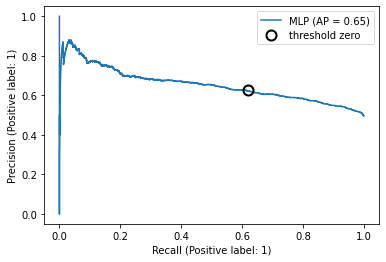

In [27]:
pr_mlp = plot_precision_recall_curve(model2, X_test, y_test, name='MLP')
# also compute the precision/recall trade-off from predict
p_mlp, r_mlp, _, _ = precision_recall_fscore_support(y_test, model2.predict(X_test), average='binary') 
#plot the dot on the graph

plt.plot(p_mlp, r_mlp, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()

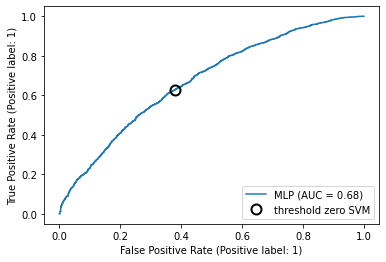

In [28]:
#plot ROC curve
confusion_mlp = confusion_matrix(y_test, model2.predict(X_test), normalize='true')

plot_roc_curve(model2, X_test, y_test, name='MLP')

plt.plot(confusion_mlp[0, 1], confusion_mlp[1, 1], 'o', markersize=10,
         label="threshold zero SVM", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

The performances are the same when choosing the best model using GridSearchCV comparison based on Accuracy and ROC-AUC.

### - Quantifying the cost of mistakes

#### Model 1

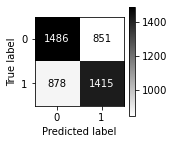

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion = confusion_matrix(y_test, model1_predicted)
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(model1, X_test, y_test, cmap='gray_r', ax=ax)

In [30]:
FP = confusion[1,0]
FP 

878

In [31]:
FN = confusion[0,1]
FN 

851

In [32]:
total_cost_model1 = FN *10000 + FP*20000
total_cost_model1

26070000

#### Model 2

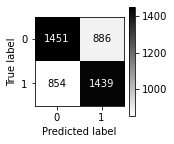

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion = confusion_matrix(y_test, model2_predicted)
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(model2, X_test, y_test, cmap='gray_r', ax=ax)

In [34]:
FP2 = confusion[1,0]
FP2 

854

In [35]:
FN2 = confusion[0,1]
FN2 

886

In [36]:
total_cost_model2 = FN2 *10000 + FP2*20000
total_cost_model2

26070000